# Preprocessing data for text emotion classification

## 0. Combining datasets

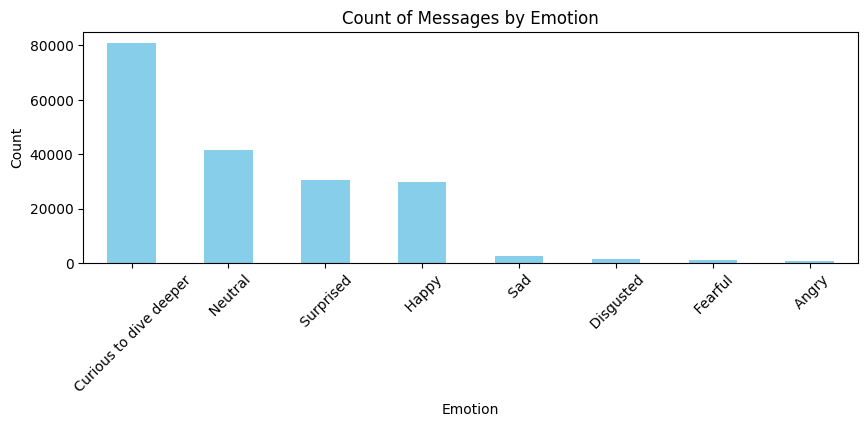

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/text/topical_chat.csv')
emotion_counts = df['sentiment'].value_counts()

plt.figure(figsize=(10,3))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Messages by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

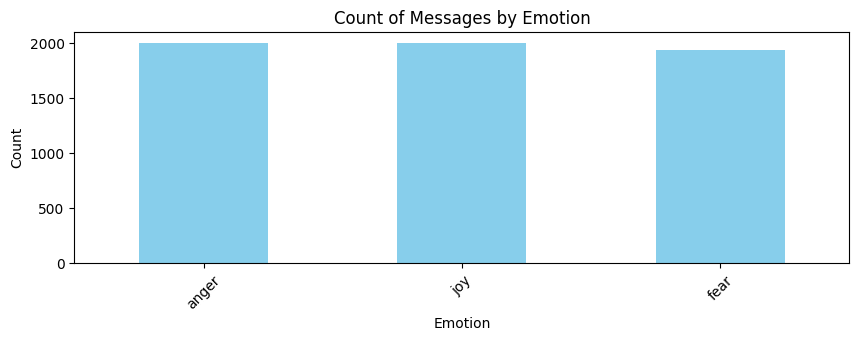

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/text/Emotion_classify_Data.csv')
emotion_counts = df['Emotion'].value_counts()

plt.figure(figsize=(10,3))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Messages by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

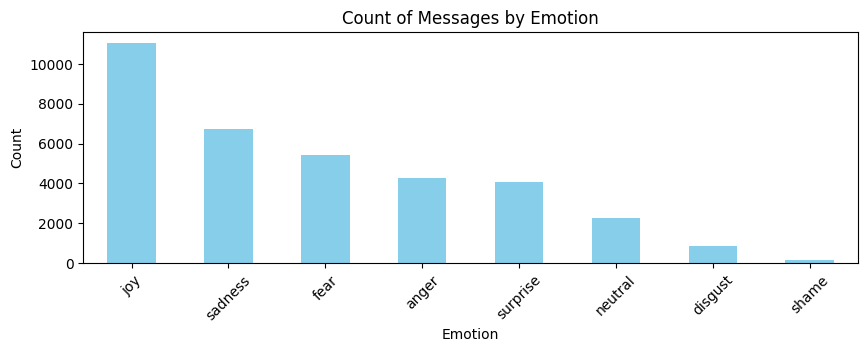

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/text/emotion_dataset_raw.csv')
emotion_counts = df['Emotion'].value_counts()

plt.figure(figsize=(10,3))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Messages by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [28]:
import pandas as pd

# Load datasets
df1 = pd.read_csv('../../data/text/topical_chat.csv')
df2 = pd.read_csv('../../data/text/Emotion_classify_Data.csv')
df3 = pd.read_csv('../../data/text/emotion_dataset_raw.csv')

# Drop the 'id' column from df1
df1 = df1.drop(columns=['conversation_id'])

# Rename emotion columns to a common name
df1.rename(columns={'sentiment': 'emotion', 'message': 'text'}, inplace=True)
df2.rename(columns={'Emotion': 'emotion', 'Comment': 'text'}, inplace=True)
df3.rename(columns={'Emotion': 'emotion', 'Text': 'text'}, inplace=True)

# Define a list of emotions to avoid
emotions_to_avoid = ['curious to dive deeper', 'shame']

# Define a dictionary to rename emotions (old_name: new_name)

emotions_to_rename = {
    'joy': 'happy',
    'disgusted': 'disgust',
    'anger': 'angry',
    'fearful': 'fear',
    'sadness': 'sad',
    'surprise': 'surprised',
}

# Ensure all 'emotion' columns are strings and clean up whitespace
df1['emotion'] = df1['emotion'].astype(str).str.strip().str.lower()
df2['emotion'] = df2['emotion'].astype(str).str.strip().str.lower()
df3['emotion'] = df3['emotion'].astype(str).str.strip().str.lower()

# Assuming the message column is named 'message'
df1['text'] = df1['text'].astype(str).str.lstrip()
df2['text'] = df2['text'].astype(str).str.lstrip()
df3['text'] = df3['text'].astype(str).str.lstrip()

# Filter out rows where 'emotion' column contains any of the unwanted emotions
df1_filtered = df1[~df1['emotion'].isin(emotions_to_avoid)]
df2_filtered = df2[~df2['emotion'].isin(emotions_to_avoid)]
df3_filtered = df3[~df3['emotion'].isin(emotions_to_avoid)]

df1_filtered.loc[:, 'emotion'] = df1_filtered['emotion'].replace(emotions_to_rename)
df2_filtered.loc[:, 'emotion'] = df2_filtered['emotion'].replace(emotions_to_rename)
df3_filtered.loc[:, 'emotion'] = df3_filtered['emotion'].replace(emotions_to_rename)

# Concatenate the filtered and renamed datasets
combined_df = pd.concat([df1_filtered, df2_filtered, df3_filtered], ignore_index=True)

# Save the combined dataset
combined_df.to_csv('../../data/text/combined_raw.csv', index=False)

# Display the first few rows of the combined dataset
print(combined_df.head())

                                                text    emotion
0  Freshwater fish only drink water through the s...      happy
1  i think everyone must use it daily! its become...    neutral
2  Agreed. The Google headquarters in Mountain Vi...    neutral
3  thats funny. The current CEO is Sundar Pichai,...    neutral
4  Oh yeah I didn't know that either. I also want...  surprised


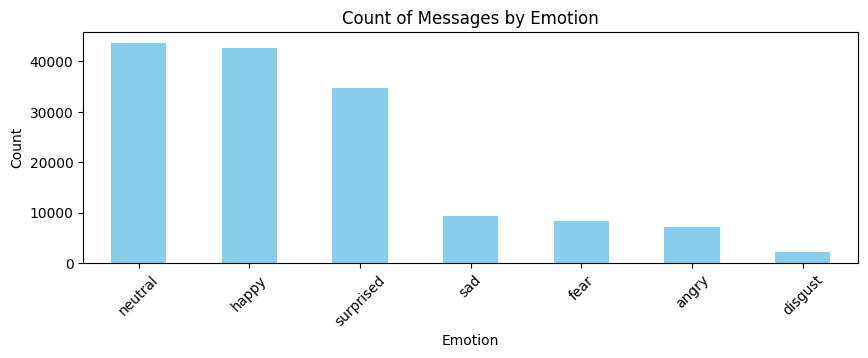

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../../data/text/combined_raw.csv')
emotion_counts = df['emotion'].value_counts()

plt.figure(figsize=(10,3))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Messages by Emotion')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [32]:
import pandas as pd

# Load dataset
df = pd.read_csv('../../data/text/combined_raw.csv')

# Ensure the message column is a string
df['text'] = df['text'].astype(str)

# Calculate the length of each message
df['message_length'] = df['text'].apply(len)

# Find the row with the maximum message length
longest_message_row = df.loc[df['message_length'].idxmax()]

# Extract the longest message
longest_message = longest_message_row['text']
longest_message_length = longest_message_row['message_length']
longest_message_emotion = longest_message_row['emotion']

# Print the result
print(f"Longest message length: {longest_message_length}")
print(f"Longest message emotion: {longest_message_emotion}")
print(f"Longest message: {longest_message}")


Longest message length: 1159
Longest message emotion: angry
Longest message: Jacob , you have the luxury of having a haircut that rarely needs styling . I don ’ t . I have to set aside about an hour and a half to get ready in the mornings . Every day , I wake up and head straight for the shower . Every second day , I wash my hair . If it ’ s a hair-washing day , I frequently need to wash my hair twice because it gets really oily . Then I usually put in a conditioner and have to rinse that out too . Because my hair is so long , I seldom manage to take a shower in under twenty minutes . Afterwards , I often put on a pot of coffee and get dressed while I wait for it to brew . I take a long time to get dressed in the morning . Every now and then I remember to choose my outfit the night before , but usually I do it in the morning . In all , getting dressed takes about half an hour , at which time my hair is now semi-dry so then I have to style my hair . From time to time I ’ ll put my hair 

## 1. Cleaning dataset

In [17]:

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from autocorrect import Speller
from nltk.stem import PorterStemmer, WordNetLemmatizer, wordnet
from nltk import pos_tag
from collections import defaultdict


text = "Maybe because of the risk of the game- I certainly wouldn't want to try it. And that's news to me, I thought there were at least a couple more"
stop_words = set(stopwords.words('english'))
spell = Speller()
lemmatizer = WordNetLemmatizer()

text = text.replace("“", "\"").replace("”","\"").replace("-", " ").replace("'", " ")

words = word_tokenize(text)
words = ['not' if word == 't' else spell(word) for word in words]

tagged_words = pos_tag(words)

tag_map = defaultdict(lambda: "n")
tag_map["N"] = "n"
tag_map["V"] = "v"
tag_map["J"] = "a"
tag_map["R"] = "r"

words = [lemmatizer.lemmatize(word, pos=tag_map[tag[0]]) for word, tag in tagged_words]

words = [word for word in words if word.isalpha() and word not in stop_words or word in ['not', 'no']]
# words = [word for word in words if word.isalpha() and word not in stop_words]
print(words)

['Maybe', 'risk', 'game', 'I', 'certainly', 'not', 'want', 'try', 'And', 'news', 'I', 'think', 'least', 'couple']


In [51]:
from collections import defaultdict
import demoji
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer, wordnet
from nltk import pos_tag
from autocorrect import Speller

# Initialize tools
spell = Speller()
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text):
    # Replace emojis
    text = demoji.replace(text)
    
    # Remove smart quotes and dashes
    text = text.replace("“", "\"").replace("”","\"").replace("-", " ").replace("'", " ")

    # Lowercase text
    text = text.lower()

    # Tokenize text
    words = word_tokenize(text)
    # print(words)
    
    # Spelling correction + replace all t with not
    words = ['not' if word == 't' else spell(word) for word in words]

    # Remove stop words and non-alphabetic tokens and punctuation
    words = [word for word in words if word.isalpha() and word not in stop_words or word in ['not', 'no']]

    # Stemming (it's more fast but less accurate alternative to Lemmatization)
    # words = [stemmer.stem(word) for word in words]
    
    # POS tagging and Lemmatization
    tagged_words = pos_tag(words)
    
    tag_map = defaultdict(lambda: "n")
    tag_map["N"] = "n"
    tag_map["V"] = "v"
    tag_map["J"] = "a"
    tag_map["R"] = "r"
    
    words = [lemmatizer.lemmatize(word, pos=tag_map[tag[0]]) for word, tag in tagged_words]

    # Return cleaned words as a single string
    return ' '.join(words)

In [52]:
import pandas as pd

data = (pd.read_csv('../../data/text/combined_raw.csv'))
data = data.dropna(how='any')

for row in data.values:
    row[0] = clean_text(row[0])

data.to_csv('../../data/text/combined_cleaned.csv', index=False)
